___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

<h1><p style="text-align: center;">Traffic Police Stops
 <br>Part - 3</p><h1> - Visual Exploratory Data Analysis<img src="https://docs.google.com/uc?id=17CPCwi3_VvzcS87TOsh4_U8eExOhL6Ki" class="img-fluid" alt="CLRSWY" width="200" height="100">

Are you more likely to get arrested at a certain time of day? Are drug-related stops on the rise? In this chapter, you will answer these and other questions by analyzing the dataset visually, since plots can help you to understand trends in a way that examining the raw data cannot.

## Calculating the hourly arrest rate

When a police officer stops a driver, a small percentage of those stops ends in an arrest. This is known as the **arrest rate**. In this exercise, you'll find out whether the arrest rate varies by time of day.

First, you'll calculate the arrest rate across all stops. Then, you'll calculate the **hourly arrest rate** by using the ``hour`` attribute of the ``index``. The hour ranges from ``0`` to ``23``, in which:

``0 = midnight``<br>
``12 = noon`` <br>
``23 = 11 PM``

> Before starting your work in this section **repeat the steps which you did in the previos chapter for preparing the data** or **use the csv file you created at the end of chapter-2.*** Continue to this chapter based on where you were in the end of the previous chapter.

> Be sure 'stop_datetime' column is dataframe's index.

In [2]:
import pandas as pd
import numpy as np
from scipy import stats
#from scipy import math

In [3]:
ri = pd.read_csv("RI_Part_2.csv")

C:\Users\deniz\AppData\Local\Temp\ipykernel_8836\336342989.py:1: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  ri = pd.read_csv("RI_Part_2.csv")


In [4]:
ri.head()

,id,state,location_raw,police_department,driver_gender,driver_age_raw,driver_age,driver_race_raw,driver_race,violation_raw,...,search_conducted,search_type_raw,search_type,contraband_found,stop_outcome,is_arrested,stop_duration,out_of_state,drugs_related_stop,district
2005-01-02 01:55:00,RI-2005-00001,RI,Zone K1,600,M,1985.0,20.0,W,White,Speeding,...,False,NaN,NaN,False,Citation,False,0-15 Min,False,False,Zone K1
2005-01-02 20:30:00,RI-2005-00002,RI,Zone X4,500,M,1987.0,18.0,W,White,Speeding,...,False,NaN,NaN,False,Citation,False,16-30 Min,False,False,Zone X4
2005-01-04 12:55:00,RI-2005-00004,RI,Zone X4,500,M,1986.0,19.0,W,White,Equipment/Inspection Violation,...,False,NaN,NaN,False,Citation,False,0-15 Min,False,False,Zone X4
2005-01-06 01:30:00,RI-2005-00005,RI,Zone X4,500,M,1978.0,27.0,B,Black,Equipment/Inspection Violation,...,False,NaN,NaN,False,Citation,False,0-15 Min,False,False,Zone X4
2005-01-12 08:05:00,RI-2005-00006,RI,Zone X1,0,M,1973.0,32.0,B,Black,Call for Service,...,False,NaN,NaN,False,Citation,False,30+ Min,True,False,Zone X1


In [5]:
ri.columns

Index(['id', 'state', 'location_raw', 'police_department', 'driver_gender',
       'driver_age_raw', 'driver_age', 'driver_race_raw', 'driver_race',
       'violation_raw', 'violation', 'search_conducted', 'search_type_raw',
       'search_type', 'contraband_found', 'stop_outcome', 'is_arrested',
       'stop_duration', 'out_of_state', 'drugs_related_stop', 'district'],
      dtype='object')

In [6]:
ri.shape

(480584, 21)

**INSTRUCTIONS**

*   Take the mean of the ``is_arrested`` column to calculate the overall arrest rate.
*   Get the type of the dataframe's index and see the hour of the stop_datetime by using hour attribute
*   Group by the ``hour`` attribute of the ``DataFrame`` index to calculate the hourly arrest rate.
*   Save the **hourly arrest rate** ``Series`` as a new object, ``hourly_arrest_rate``.

In [7]:
# CODE HERE

In [8]:
ri["is_arrested"].mean()

0.03454755048024903

In [9]:
# CODE HERE

In [10]:
ri.index

Index(['2005-01-02 01:55:00', '2005-01-02 20:30:00', '2005-01-04 12:55:00',
       '2005-01-06 01:30:00', '2005-01-12 08:05:00', '2005-01-18 08:15:00',
       '2005-01-18 17:13:00', '2005-01-23 23:15:00', '2005-01-24 20:32:00',
       '2005-02-09 03:05:00',
       ...
       '2015-12-31 22:10:00', '2015-12-31 22:14:00', '2015-12-31 22:26:00',
       '2015-12-31 22:38:00', '2015-12-31 22:39:00', '2015-12-31 22:46:00',
       '2015-12-31 22:47:00', '2015-12-31 23:08:00', '2015-12-31 23:44:00',
       '2015-12-31 23:48:00'],
      dtype='object', length=480584)

In [11]:
# CODE HERE

In [12]:
type(ri.index)

pandas.core.indexes.base.Index

In [13]:
ri.index.dtype

dtype('O')

In [14]:
ri.index = ri.index.astype('datetime64[ns]', copy=True)

In [15]:
type(ri.index)

pandas.core.indexes.datetimes.DatetimeIndex

In [16]:
# CODE HERE

In [17]:
ri.index.hour

Index([ 1, 20, 12,  1,  8,  8, 17, 23, 20,  3,
       ...
       22, 22, 22, 22, 22, 22, 22, 23, 23, 23],
      dtype='int32', length=480584)

In [18]:
ri.index.hour.unique()

Index([ 1, 20, 12,  8, 17, 23,  3,  2,  4,  5, 10, 15, 14,  9,  0, 21, 22, 13,
       16, 11,  7, 19, 18,  6],
      dtype='int32')

In [19]:
ri.index.hour.nunique()

24

In [20]:
# CODE HERE

In [21]:
ri.groupby(ri.index.hour).is_arrested.mean()

0     0.052151
1     0.067127
2     0.061067
3     0.052613
4     0.053897
5     0.032657
6     0.012949
7     0.013829
8     0.019717
9     0.024699
10    0.025583
11    0.027078
12    0.031361
13    0.030250
14    0.031531
15    0.032125
16    0.033519
17    0.038989
18    0.039902
19    0.031366
20    0.039292
21    0.059956
22    0.043980
23    0.045087
Name: is_arrested, dtype: float64

In [22]:
# CODE HERE

In [23]:
hourly_arrest_rate = ri.groupby(ri.index.hour).is_arrested.mean()
hourly_arrest_rate

0     0.052151
1     0.067127
2     0.061067
3     0.052613
4     0.053897
5     0.032657
6     0.012949
7     0.013829
8     0.019717
9     0.024699
10    0.025583
11    0.027078
12    0.031361
13    0.030250
14    0.031531
15    0.032125
16    0.033519
17    0.038989
18    0.039902
19    0.031366
20    0.039292
21    0.059956
22    0.043980
23    0.045087
Name: is_arrested, dtype: float64

***

## Plotting the hourly arrest rate

You'll create a line plot from the ``hourly_arrest_rate`` object. A line plot is appropriate in this case because you're showing how a quantity changes over time.

This plot should help you to spot some trends that may not have been obvious when examining the raw numbers!

**INSTRUCTIONS**

*   Import ``matplotlib.pyplot`` using the alias ``plt``.
*   Create a **line plot** of ``hourly_arrest_rate`` using the ``.plot()`` method.
*   Label the ``x-axis`` as ``'Hour'``, label the ``y-axis`` as ``'Arrest Rate'``, and title the plot ``'Arrest Rate by Time of Day'``.
*   Display the plot using the ``.show()`` function.

In [24]:
# CODE HERE

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

In [26]:
# CODE HERE

In [27]:

plt.show()

In [28]:
# CODE HERE

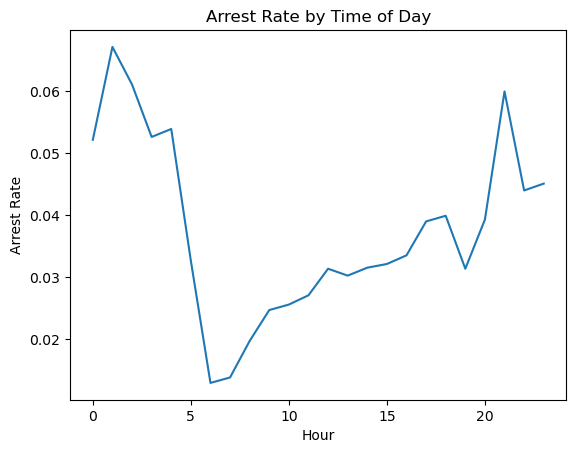

In [29]:
hourly_arrest_rate.plot()

plt.title("Arrest Rate by Time of Day")
plt.xlabel("Hour")
plt.ylabel("Arrest Rate")

plt.show()

***

## Plotting drug-related stops

In a small portion of traffic stops, drugs are found in the vehicle during a search. You'll assess whether these **drug-related stops** are becoming more common over time.

The Boolean column ``drugs_related_stop`` indicates whether drugs were found during a given stop. You'll calculate the **annual drug rate** by **resampling** this column, and then you'll use a line plot to visualize how the rate has changed over time.

**INSTRUCTIONS**

*   Calculate the **annual rate** of drug-related stops by **resampling** the ``drugs_related_stop`` column (on the ``'A'`` frequency) and taking the mean.
*   Save the annual drug rate ``Series`` as a new object, ``annual_drug_rate``.
*   Create a line plot of ``annual_drug_rate`` using the ``.plot()`` method.
*   Display the plot using the ``.show()`` function.

In [30]:
# CODE HERE

In [31]:
ri.head(1)

,id,state,location_raw,police_department,driver_gender,driver_age_raw,driver_age,driver_race_raw,driver_race,violation_raw,...,search_conducted,search_type_raw,search_type,contraband_found,stop_outcome,is_arrested,stop_duration,out_of_state,drugs_related_stop,district
2005-01-02 01:55:00,RI-2005-00001,RI,Zone K1,600,M,1985.0,20.0,W,White,Speeding,...,False,NaN,NaN,False,Citation,False,0-15 Min,False,False,Zone K1


In [32]:
ri["drugs_related_stop"].value_counts()

drugs_related_stop
False    475819
True       4765
Name: count, dtype: int64

In [33]:
# CODE HERE

In [34]:
ri.drugs_related_stop.resample("A").mean()

2005-12-31    0.008038
2006-12-31    0.006624
2007-12-31    0.008437
2008-12-31    0.007549
2009-12-31    0.010447
2010-12-31    0.010142
2011-12-31    0.011400
2012-12-31    0.010343
2013-12-31    0.011879
2014-12-31    0.013176
2015-12-31    0.010598
Freq: A-DEC, Name: drugs_related_stop, dtype: float64

In [35]:
annual_drug_rate = ri.drugs_related_stop.resample("A").mean()
annual_drug_rate

2005-12-31    0.008038
2006-12-31    0.006624
2007-12-31    0.008437
2008-12-31    0.007549
2009-12-31    0.010447
2010-12-31    0.010142
2011-12-31    0.011400
2012-12-31    0.010343
2013-12-31    0.011879
2014-12-31    0.013176
2015-12-31    0.010598
Freq: A-DEC, Name: drugs_related_stop, dtype: float64

In [36]:
# CODE HERE

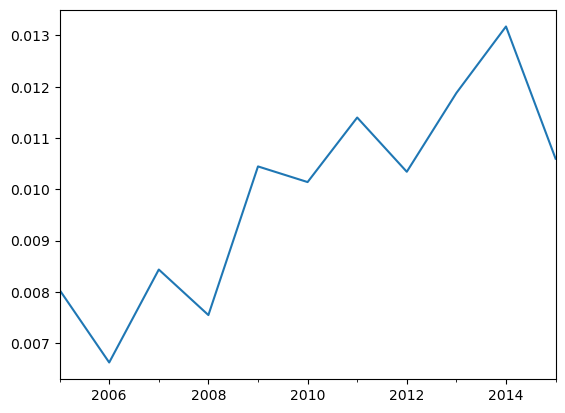

In [37]:
annual_drug_rate.plot()
plt.show()

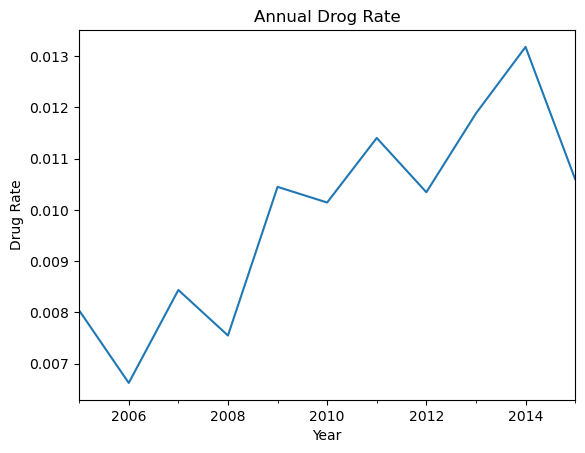

In [38]:
annual_drug_rate.plot()

plt.title("Annual Drog Rate")
plt.xlabel("Year")
plt.ylabel("Drug Rate")

plt.show()

***

## Comparing drug and search rates (to be deleted)

As you saw in the last exercise, the rate of **drug-related stops** increased significantly between ``2005`` and ``2015``. You might hypothesize that the rate of vehicle searches was also increasing, which would have led to an increase in drug-related stops even if more drivers were not carrying drugs.

You can test this hypothesis by calculating the annual search rate, and then plotting it against the annual drug rate. If the hypothesis is true, then you'll see both rates increasing over time.

**INSTRUCTIONS**

*   Calculate the annual search rate by **resampling** the ``search_conducted`` column, and save the result as ``annual_search_rate``.
*   Concatenate ``annual_drug_rate`` and ``annual_search_rate`` along the ``columns axis``, and save the result as ``annual``.
*   Create subplots of the drug and search rates from the ``annual`` ``DataFrame``.
*   Display the subplots.

In [39]:
# CODE HERE

In [40]:
ri["search_conducted"].dtype

dtype('bool')

In [41]:
ri["search_conducted"].head(1)

2005-01-02 01:55:00    False
Name: search_conducted, dtype: bool

In [42]:
# CODE HERE

In [43]:
ri["search_conducted"].dropna().astype("int").resample("A").mean()

2005-12-31    0.050692
2006-12-31    0.037748
2007-12-31    0.041844
2008-12-31    0.039544
2009-12-31    0.049849
2010-12-31    0.042089
2011-12-31    0.037767
2012-12-31    0.032278
2013-12-31    0.029054
2014-12-31    0.030157
2015-12-31    0.027832
Freq: A-DEC, Name: search_conducted, dtype: float64

In [44]:
annual_search_rate = ri["search_conducted"].dropna().astype("int").resample("A").mean()
annual_search_rate

2005-12-31    0.050692
2006-12-31    0.037748
2007-12-31    0.041844
2008-12-31    0.039544
2009-12-31    0.049849
2010-12-31    0.042089
2011-12-31    0.037767
2012-12-31    0.032278
2013-12-31    0.029054
2014-12-31    0.030157
2015-12-31    0.027832
Freq: A-DEC, Name: search_conducted, dtype: float64

In [45]:
# CODE HERE

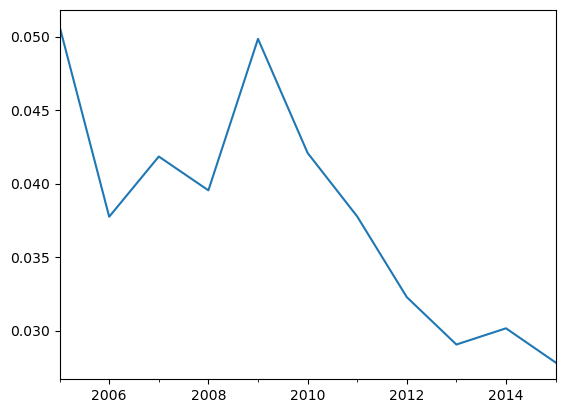

In [46]:
annual_search_rate.plot()
plt.show()

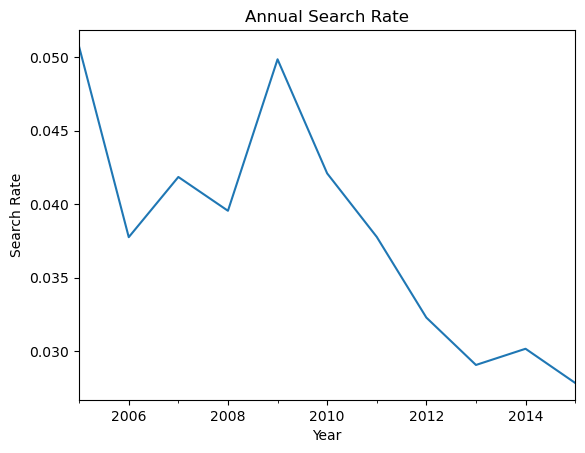

In [47]:
annual_search_rate.plot()

plt.title("Annual Search Rate")
plt.xlabel("Year")
plt.ylabel("Search Rate")

plt.show()

In [48]:
# CODE HERE

In [49]:
annual = pd.concat([annual_drug_rate,annual_search_rate],axis=1)

In [50]:
annual

,drugs_related_stop,search_conducted
2005-12-31,0.008038,0.050692
2006-12-31,0.006624,0.037748
2007-12-31,0.008437,0.041844
2008-12-31,0.007549,0.039544
2009-12-31,0.010447,0.049849
2010-12-31,0.010142,0.042089
2011-12-31,0.011400,0.037767
2012-12-31,0.010343,0.032278
2013-12-31,0.011879,0.029054
2014-12-31,0.013176,0.030157


In [51]:
# CODE HERE

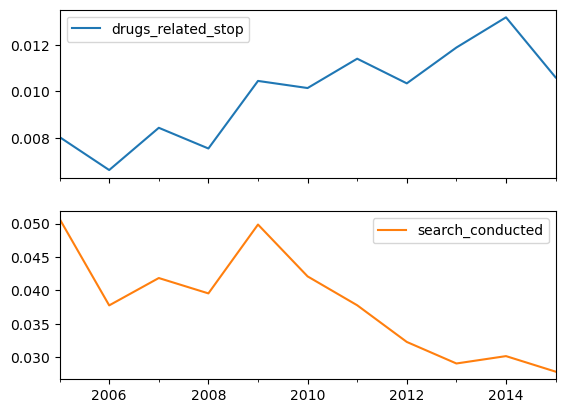

In [52]:
annual.plot(subplots=True);

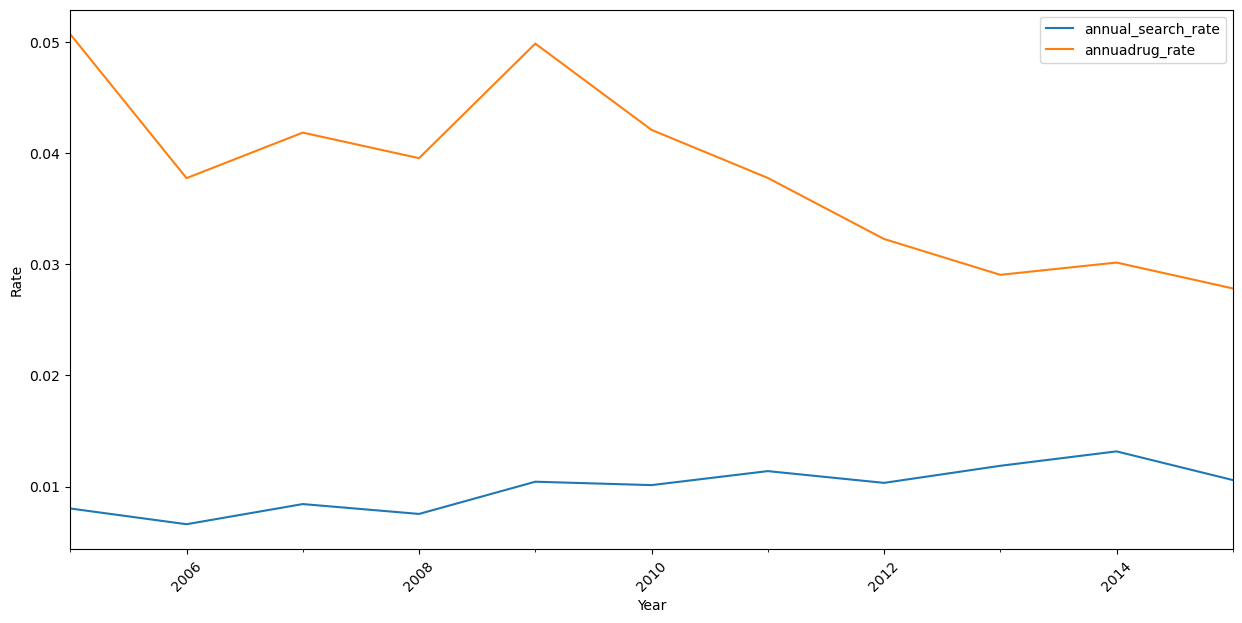

In [53]:
plt.figure(figsize = (15,7))
annual_drug_rate.plot()
annual_search_rate.plot()
plt.legend(labels=['annual_search_rate','annuadrug_rate'], facecolor='white')
plt.xlabel('Year')
plt.ylabel('Rate')
plt.xticks(rotation = 45)

plt.show()

***

## Tallying violations by district

The state of **Rhode Island** is broken into six police districts, also known as zones. How do the zones compare in terms of what violations are caught by police?

In this exercise, you'll create a frequency table to determine how many violations of each type took place in each of the six zones. Then, you'll filter the table to focus on the ``"K"`` zones, which you'll examine further in the next exercise.

**INSTRUCTIONS**

*   Create a ``frequency table`` from the ``district`` and ``violation`` columns using the ``pd.crosstab()`` function.
*   Save the ``frequency table`` as a new object, ``all_zones``.
*   Select rows ``'Zone K1'`` through ``'Zone K3'`` from ``all_zones`` using the ``.loc[]`` accessor.
*   Save the smaller table as a new object, ``k_zones``.

In [54]:
# CODE HERE

In [55]:
pd.crosstab(ri.district, ri.violation)

violation,Equipment,Moving violation,Other,Registration/plates,Seat belt,Speeding
district,,,,,,
Zone K1,3786,7127,1501,628,1,33067
Zone K2,11285,16440,5103,4056,2897,57500
Zone K3,12959,16218,3926,3871,3660,68234
Zone X1,1725,3711,752,192,451,6393
Zone X3,11520,17178,4069,3532,4445,48687
Zone X4,19975,29554,8865,7551,4870,54855


In [56]:
# CODE HERE

In [57]:
all_zones = pd.crosstab(ri.district, ri.violation)

In [58]:
# CODE HERE

In [59]:
all_zones.loc['Zone K1':'Zone K3']

violation,Equipment,Moving violation,Other,Registration/plates,Seat belt,Speeding
district,,,,,,
Zone K1,3786,7127,1501,628,1,33067
Zone K2,11285,16440,5103,4056,2897,57500
Zone K3,12959,16218,3926,3871,3660,68234


In [60]:
k_zones = all_zones.loc['Zone K1':'Zone K3']
k_zones

violation,Equipment,Moving violation,Other,Registration/plates,Seat belt,Speeding
district,,,,,,
Zone K1,3786,7127,1501,628,1,33067
Zone K2,11285,16440,5103,4056,2897,57500
Zone K3,12959,16218,3926,3871,3660,68234


In [61]:
# all_zones_alternative = ri.groupby('district')['violation'].value_counts().unstack()

In [62]:
# all_zones_alternative.iloc[0:3]

***

## Plotting violations by district

Now that you've created a frequency table focused on the ``"K"`` zones, you'll visualize the data to help you compare what violations are being caught in each zone.

First you'll create a **bar plot**, which is an appropriate plot type since you're comparing categorical data. Then you'll create a **stacked bar plot** in order to get a slightly different look at the data. Which plot do you find to be more insightful?

**INSTRUCTIONS 1/2**

*   Create a bar plot of ``k_zones``.
*   Display the plot and examine it. What do you notice about each of the zones?

In [63]:
# CODE HERE

<Figure size 2000x1200 with 0 Axes>

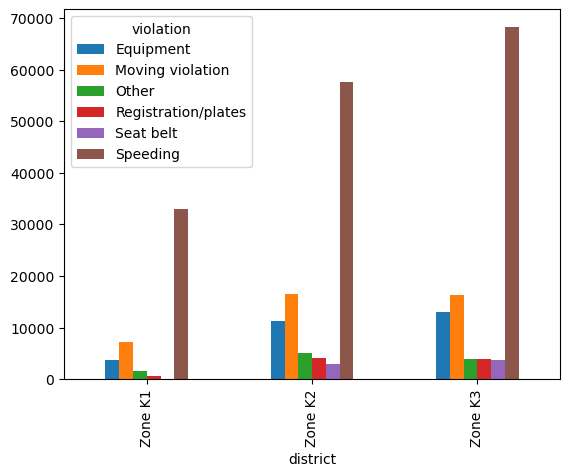

In [64]:
plt.figure(figsize=(10,6),dpi=200)
k_zones.plot(kind = 'bar')
plt.show()

**INSTRUCTIONS 2/2**

*   Create a stacked bar plot of ``k_zones``.
*   Display the plot and examine it. Do you notice anything different about the data than you did previously?

In [65]:
# CODE HERE

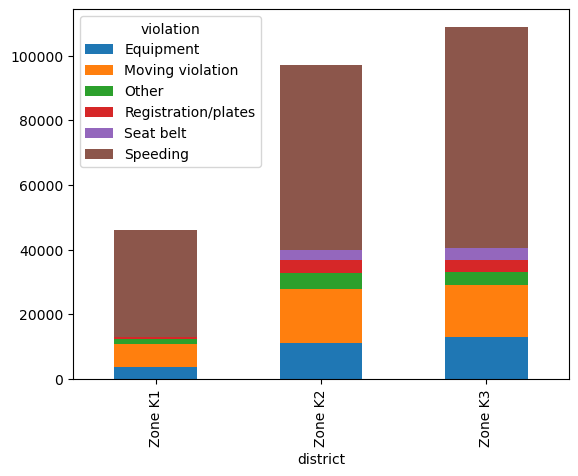

In [66]:
k_zones.plot(kind = 'bar',stacked = True)
plt.show()

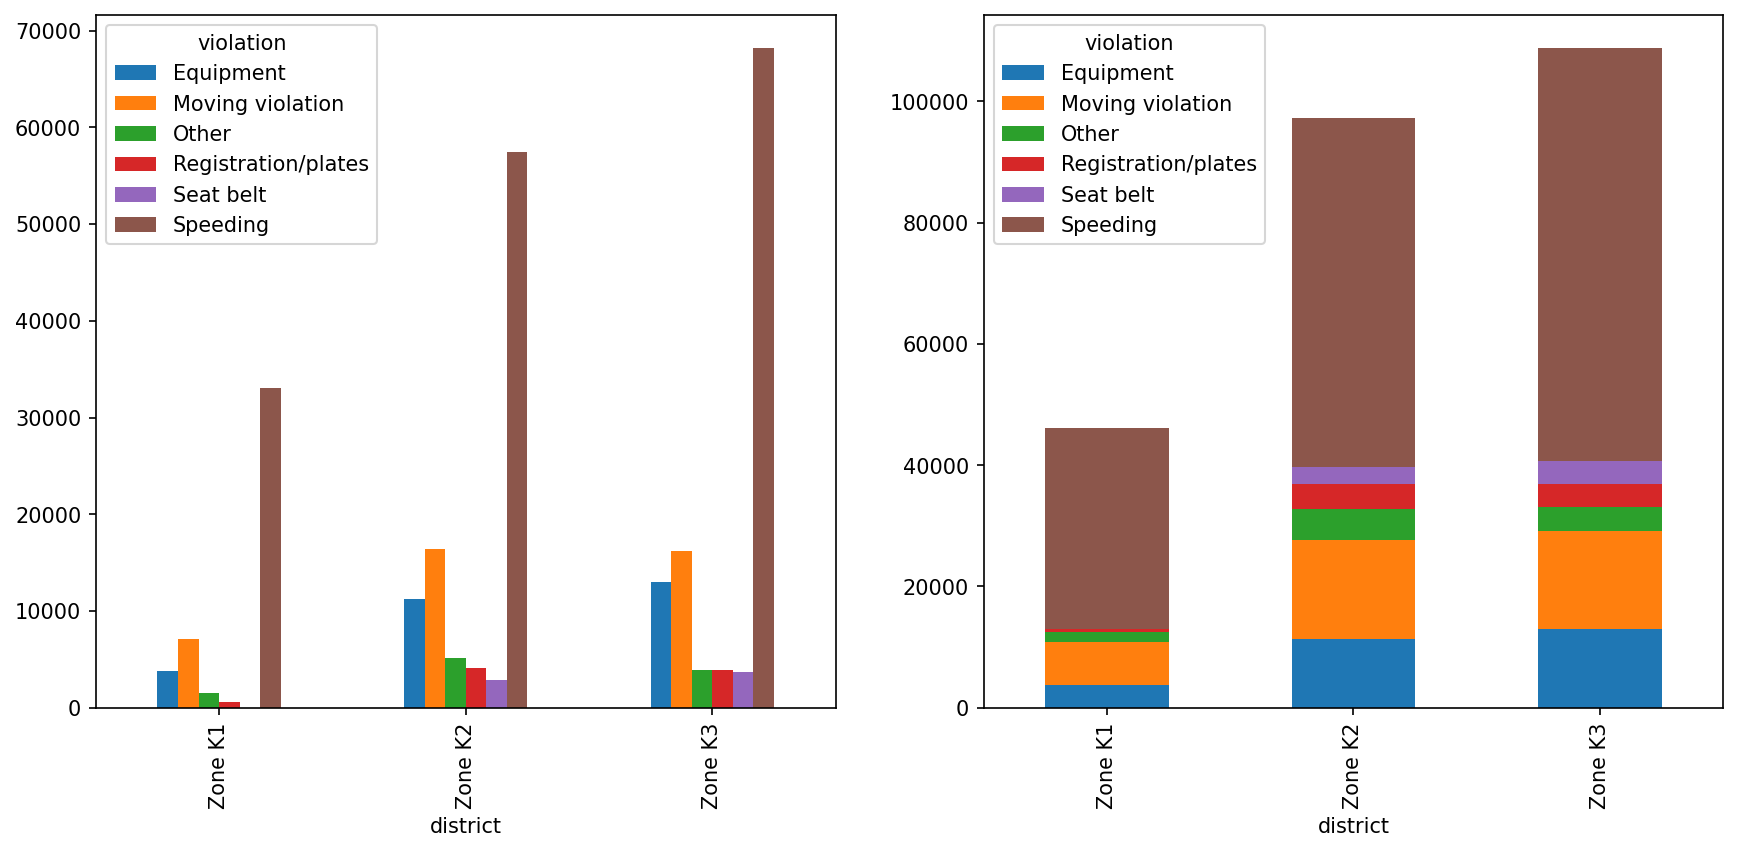

In [67]:
fig, ax = plt.subplots(1,2, figsize = (14,6),dpi = 150)
k_zones.plot(kind='bar', ax = ax[0]);
k_zones.plot(kind='bar', ax = ax[1], stacked = True);

***

## Converting stop durations to numbers

In the traffic stops dataset, the ``stop_duration`` column tells you approximately how long the driver was detained by the officer. Unfortunately, the durations are stored as ``strings``, such as ``'0-15 Min'``. How can you make this data easier to analyze?

In this exercise, you'll convert the **stop durations** to ``integers``. Because the precise durations are not available, you'll have to estimate the numbers using reasonable values:

*   Convert ``'0-15 Min'`` to ``8``
*   Convert ``'16-30 Min'`` to ``23``
*   Convert ``'30+ Min'`` to ``45``

**INSTRUCTIONS**

*   Print the **unique values** in the ``stop_duration`` column. (This has been done for you.)
*   Create a ``dictionary`` called ``mapping`` that maps the ``stop_duration`` strings to the integers specified above.
*   Convert the ``stop_duration`` strings to integers using the ``mapping``, and store the results in a new column called ``stop_minutes``.
*   Print the unique values in the ``stop_minutes`` column, to verify that the durations were properly converted to integers.

In [68]:
ri["stop_duration"].unique()

array(['0-15 Min', '16-30 Min', '30+ Min', '2', '1'], dtype=object)

In [69]:
# CODE HERE

In [70]:
mapping = {"0-15 Min" : 8,
           "16-30 Min": 23,
           "30+ Min" : 45}

In [71]:
# CODE HERE

In [72]:
ri["stop_minutes"] = ri["stop_duration"].map(mapping)

In [73]:
# CODE HERE

In [74]:
ri["stop_minutes"].head()

2005-01-02 01:55:00     8.0
2005-01-02 20:30:00    23.0
2005-01-04 12:55:00     8.0
2005-01-06 01:30:00     8.0
2005-01-12 08:05:00    45.0
Name: stop_minutes, dtype: float64

In [75]:
ri["stop_minutes"].unique()

array([ 8., 23., 45., nan])

***

## Plotting stop length

If you were stopped for a particular violation, how long might you expect to be detained?

In this exercise, you'll visualize the **average length** of time drivers are stopped for each **type** of **violation**. Rather than using the ``violation`` column in this exercise, you'll use ``violation_raw`` since it contains more detailed descriptions of the violations.

**INSTRUCTIONS**

*   For each value in the ``violation_raw`` column, calculate the **mean number** of ``stop_minutes`` that a driver is detained.
*   Save the resulting ``Series`` as a new object, ``stop_length``.
*   Sort ``stop_length`` by its values, and then visualize it using a **horizontal bar plot**.
*   Display the plot.

In [76]:
# CODE HERE

In [77]:
ri.groupby("violation_raw").stop_minutes.mean()

violation_raw
APB                                 18.593814
Call for Service                    21.963314
Equipment/Inspection Violation      11.454326
Motorist Assist/Courtesy            17.629929
Other Traffic Violation             13.834359
Registration Violation              13.543268
Seatbelt Violation                   9.698236
Special Detail/Directed Patrol      14.876778
Speeding                            10.589215
Suspicious Person                   18.374269
Violation of City/Town Ordinance    13.230695
Warrant                             19.769231
Name: stop_minutes, dtype: float64

In [78]:
# CODE HERE

In [79]:
stop_length = ri.groupby("violation_raw").stop_minutes.mean()

In [80]:
# CODE HERE

In [81]:
sorted_stop_length = stop_length.sort_values()

In [82]:
# CODE HERE

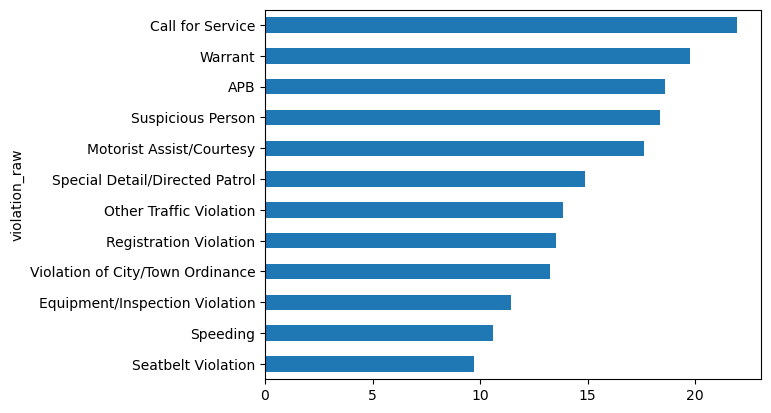

In [83]:
sorted_stop_length.plot(kind="barh")
plt.show()

___

<p style='text-align: center;'><img src='https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV' class='img-fluid' alt='CLRSWY'></p>

___

**- Please save the edits made so far to a new csv file with the name RI_Part_3 to use it in the next step.**

**- Load and read new csv file.**

**- Check the first five rows.***

**- Check the shape of the dataframe.**

In [84]:
ri.to_csv('RI_Part_3.csv', index_label = False)

In [85]:
ri = pd.read_csv('RI_Part_3.csv', low_memory=False)
ri.head()

,id,state,location_raw,police_department,driver_gender,driver_age_raw,driver_age,driver_race_raw,driver_race,violation_raw,...,search_type_raw,search_type,contraband_found,stop_outcome,is_arrested,stop_duration,out_of_state,drugs_related_stop,district,stop_minutes
2005-01-02 01:55:00,RI-2005-00001,RI,Zone K1,600,M,1985.0,20.0,W,White,Speeding,...,NaN,NaN,False,Citation,False,0-15 Min,False,False,Zone K1,8.0
2005-01-02 20:30:00,RI-2005-00002,RI,Zone X4,500,M,1987.0,18.0,W,White,Speeding,...,NaN,NaN,False,Citation,False,16-30 Min,False,False,Zone X4,23.0
2005-01-04 12:55:00,RI-2005-00004,RI,Zone X4,500,M,1986.0,19.0,W,White,Equipment/Inspection Violation,...,NaN,NaN,False,Citation,False,0-15 Min,False,False,Zone X4,8.0
2005-01-06 01:30:00,RI-2005-00005,RI,Zone X4,500,M,1978.0,27.0,B,Black,Equipment/Inspection Violation,...,NaN,NaN,False,Citation,False,0-15 Min,False,False,Zone X4,8.0
2005-01-12 08:05:00,RI-2005-00006,RI,Zone X1,0,M,1973.0,32.0,B,Black,Call for Service,...,NaN,NaN,False,Citation,False,30+ Min,True,False,Zone X1,45.0


In [86]:
ri.shape

(480584, 22)

___

<p style='text-align: center;'><img src='https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV' class='img-fluid' alt='CLRSWY'></p>

___